[('like', 1398), ('feel', 1161), ('bipolar', 1015), ('get', 914), ('day', 780), ('time', 779), ('know', 741), ('really', 608), ('thing', 606), ('manic', 565), ('episode', 545), ('one', 531), ('want', 530), ('people', 529), ('year', 518), ('life', 510), ('anyone', 500), ('think', 454), ('would', 449), ('even', 442)]
kind disorder becomes much therapist want get evaluated bipolar disorder ended
ribed abilify restlessness agitation want talk someone get struggling today lo
ire series going fix post later week want flood sub anyone want see check prof
ost later week want flood sub anyone want see check profile later week new stu
nightmare rapid cycling psychiatrist want prescribe stimulant could induce man
ing inducing mania mixed episode art want friend able keep mania depression fi
ing friend yesterday high life today want escape brain around anyone anyone el
experience abilify feeling hypomanic want mess med falling back depression dis
orking old think live say everyone n want get help 

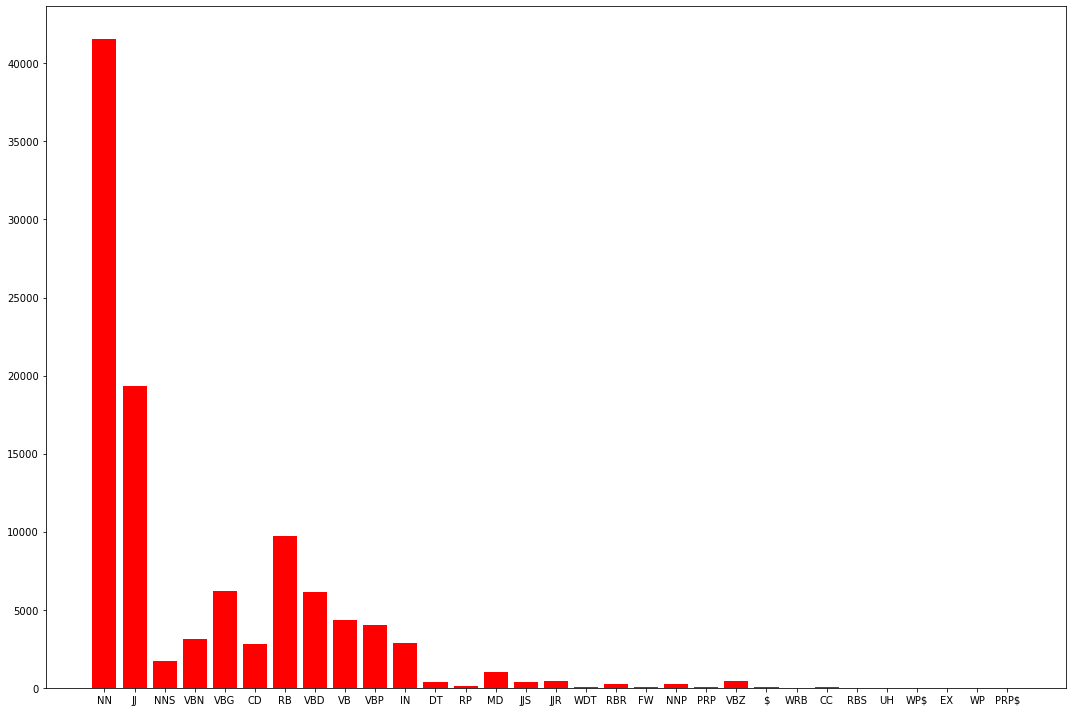

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist


df = pd.read_csv('r-bipolar data.csv')

###tokenize title and body texts###

tokenizer = RegexpTokenizer(r'\w+')
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['title'] = df['title'].apply(lambda x: remove_stopwords(x))
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['title'] = df['title'].apply(lambda x: word_lemmatizer(x))
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['title'])
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_title = []
pos_tagged_body = []
for ele in title_list:
    pos_tagged_title.append(nltk.pos_tag(ele))
for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    
df['pos_tagged_title'] = pos_tagged_title
df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['nan', 'http', 'com', 'www', 'jpg', 'width', '1600', 'format', 'pjpg', '_', 'reddit']
for item in df['pos_tagged_title']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
for row in df['pos_tagged_title']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
    
    for row in df['pos_tagged_title']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


###getting headers###
key_list = []
for key in df.keys():
    key_list.append(key)


df.to_csv('r-bipolar data cleaned.csv', index=False, header=key_list)